<a href="https://colab.research.google.com/github/Sushmita-dey015/traffic_Sign_detection_yolov8/blob/main/traffic_sign_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!python -m pip install --upgrade pip

# Install specific versions of TensorFlow and TensorBoard
!pip install tensorflow==2.16.1
!pip install tensorboard==2.16.2
!pip install protobuf==4.25.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
   

In [ ]:
import torch
from IPython.display import Image

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Traffic Sign detection Yolov8/traffic_sign_detection'

/content/drive/My Drive/Traffic Sign detection Yolov8/traffic_sign_detection


In [ ]:
!pip install roboflow

  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
!pip install pillow opencv-python scikit-image

In [ ]:
import os
import random
import shutil
from PIL import Image

base_path = '/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset-TT100k/Datasets'
dataset_path = base_path

\
output_dir = '/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset'
os.makedirs(output_dir, exist_ok=True)


for subset in ['train', 'test', 'val']:
    os.makedirs(os.path.join(output_dir, subset, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, subset, 'labels'), exist_ok=True)


train_split = 0.7
test_split = 0.2
val_split = 0.1


resize_dim = (1200, 800)


all_images = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]


random.shuffle(all_images)

train_size = int(train_split * len(all_images))
test_size = int(test_split * len(all_images))
val_size = len(all_images) - train_size - test_size

train_images = all_images[:train_size]
test_images = all_images[train_size:train_size + test_size]
val_images = all_images[train_size + test_size:]

def resize_image(image_path, output_image_path, size):
    """Resize the image and save it."""
    image = Image.open(image_path)
    image = image.resize(size, Image.LANCZOS)
    image.save(output_image_path)

def copy_label(label_path, output_label_path):
    """Copy the label file."""
    if os.path.exists(label_path):
        shutil.copy(label_path, output_label_path)

def process_images_and_labels(image_files, subset):
    """Resize images, copy them and their labels to the appropriate folder."""
    for image_file in image_files:

        image_path = os.path.join(dataset_path, image_file)
        label_path = os.path.join(dataset_path, image_file.replace('.jpg', '.txt'))


        output_image_path = os.path.join(output_dir, subset, 'images', image_file)
        output_label_path = os.path.join(output_dir, subset, 'labels', image_file.replace('.jpg', '.txt'))


        resize_image(image_path, output_image_path, resize_dim)
        copy_label(label_path, output_label_path)


process_images_and_labels(train_images, 'train')
process_images_and_labels(test_images, 'test')
process_images_and_labels(val_images, 'val')

print("Data annotation completed! Images resized and split into train, test, and validation sets.")


In [5]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

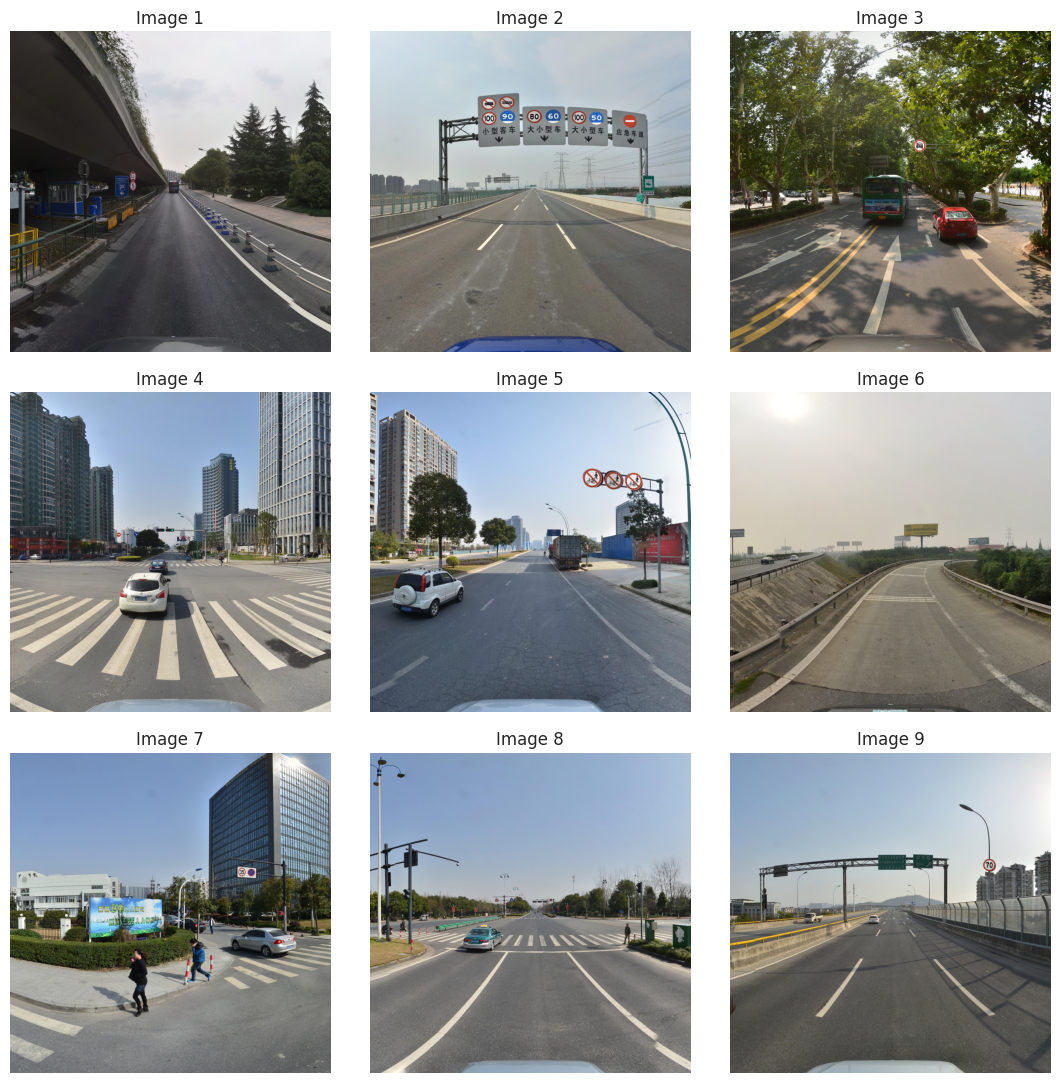

In [ ]:
Image_dir = '/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/images/train'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import os

# Define the paths for train, test, and val folders
folders = {
    "train": "/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset (1)/dataset/images/train",
    "val": "/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset (1)/dataset/images/val"
}

# Loop through each folder
for folder_name, folder_path in folders.items():
    print(f"\nProcessing {folder_name} folder:")
    result = []  # List to collect result for single line output

    # Loop through each image in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Read the image
        image = cv2.imread(file_path)

        # Check if the image was loaded correctly
        if image is not None:
            h, w, c = image.shape
            result.append(f"{filename}: {w}x{h}, {c} channels")
        else:
            result.append(f"{filename}: Could not read")

    # Print results in a single line
    print(" | ".join(result))



Processing train folder:
00317.jpg: 1360x800, 3 channels | 00623.jpg: 1360x800, 3 channels | 00603.txt: Could not read | 00255.txt: Could not read | 00518.txt: Could not read | 00313.jpg: 1360x800, 3 channels | 00752.txt: Could not read | 00849.txt: Could not read | 00203.txt: Could not read | 00135.jpg: 1360x800, 3 channels | 00637.jpg: 1360x800, 3 channels | 00776.txt: Could not read | 00174.jpg: 1360x800, 3 channels | 00184.jpg: 1360x800, 3 channels | 00251.jpg: 1360x800, 3 channels | 00465.jpg: 1360x800, 3 channels | 00319.txt: Could not read | 00245.jpg: 1360x800, 3 channels | 00467.txt: Could not read | 00689.jpg: 1360x800, 3 channels | 00339.jpg: 1360x800, 3 channels | 00472.jpg: 1360x800, 3 channels | 00187.txt: Could not read | 00199.txt: Could not read | 00716.txt: Could not read | 00891.txt: Could not read | 00300.jpg: 1360x800, 3 channels | 00527.txt: Could not read | 00508.txt: Could not read | 00272.txt: Could not read | 00763.txt: Could not read | 00630.jpg: 1360x800, 3


image 1/1 /content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/images/train/10063 (8).jpg: 640x640 1 traffic light, 13.0ms
Speed: 4.9ms preprocess, 13.0ms inference, 1049.0ms postprocess per image at shape (1, 3, 640, 640)


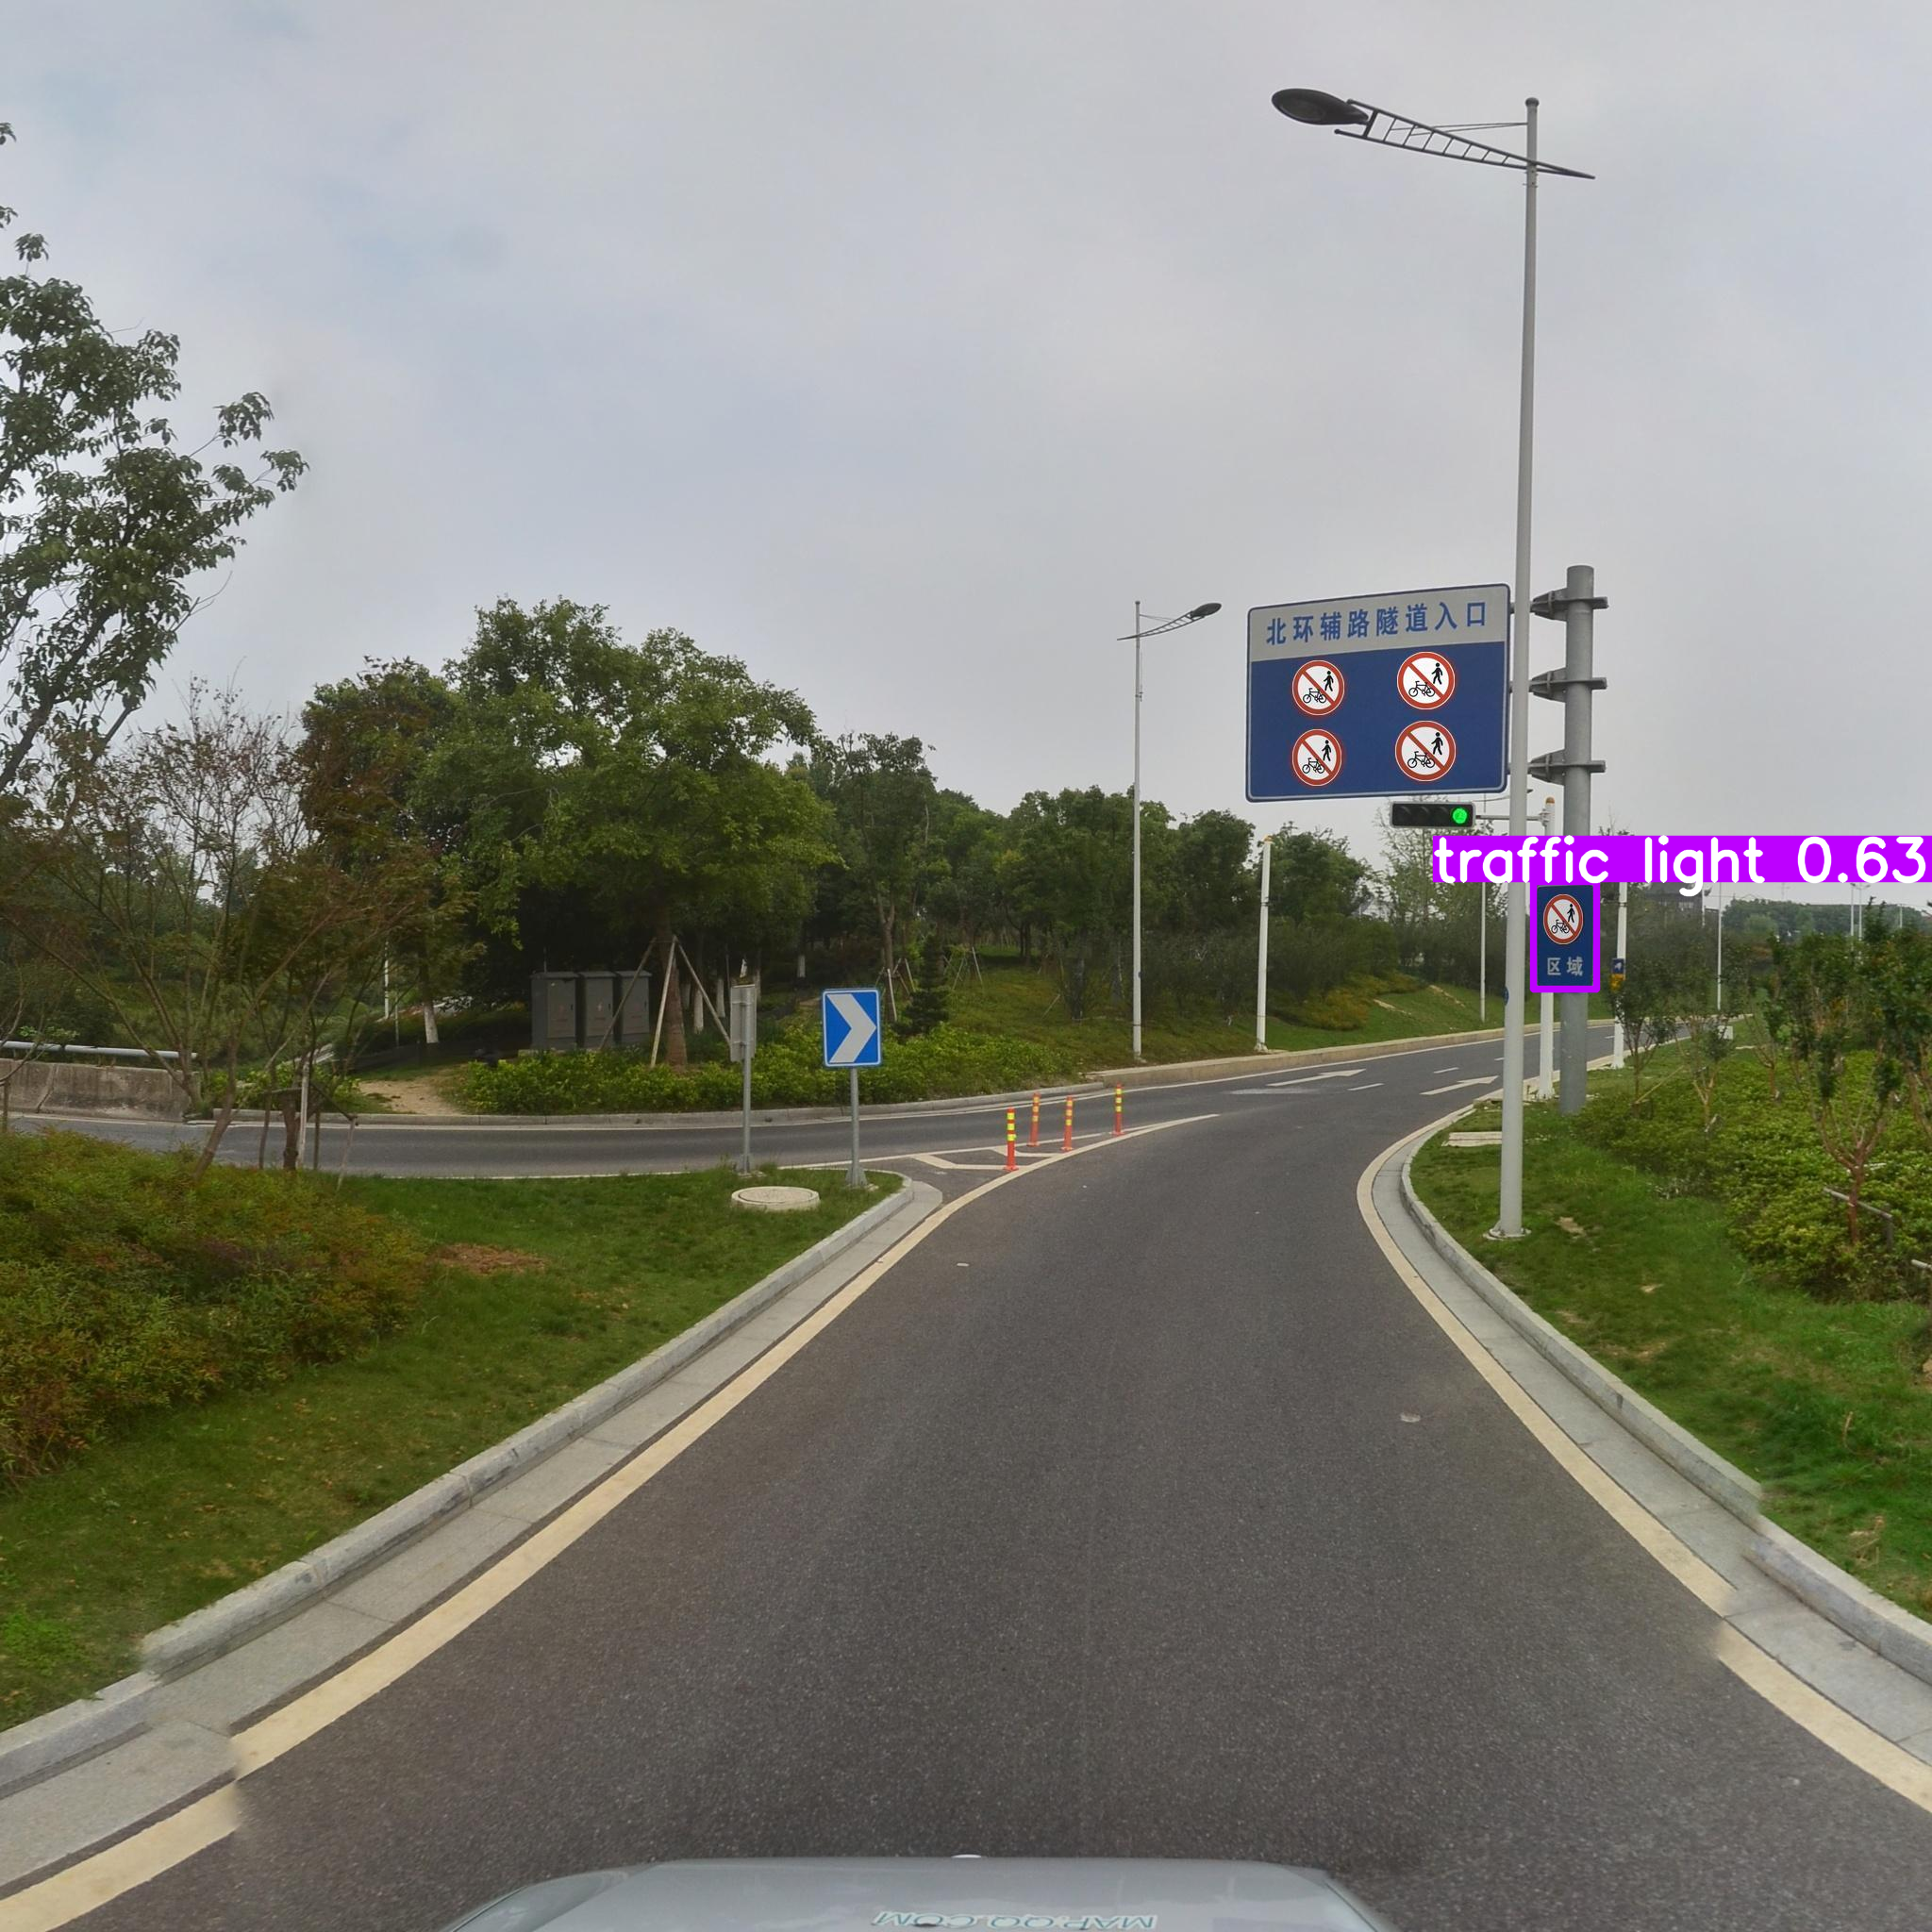

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load a pretrained YOLOv8n model
model = YOLO("/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset (1)/dataset/yolov8n.pt")

# Use the model to detect objects in the image
image = "/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/images/train/10063 (8).jpg"
result_predict = model.predict(source=image, imgsz=(640))

# Show the results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 58.1 MB/s eta 0:00:00


In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset (1)/dataset/yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/YOLOv8_TT100K.yaml",epochs =5 , batch = -1, optimizer = 'auto')

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Dataset (1)/dataset/yolov8n.pt, data=/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/YOLOv8_TT100K.yaml, epochs=5, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False

100%|██████████| 755k/755k [00:00<00:00, 24.5MB/s]


Overriding model.yaml nc=80 with nc=50

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3020598       8.247         0.189         77.85         502.1        (1, 3, 640, 640)                    list
     3020598       16.49         0.296         38.03         81.87        (2, 3, 640, 640)                    list
     3020598       32.99         0.543         27.58         61.59        (4, 3, 640, 640)                    list
     3020598       65.97         1.000         30.56         51.81        (8, 3, 640, 640)                    list
     3020598       131.9         1.940         49.07         67.63       (16, 3, 640, 640)                    list
AutoBatch: Using

train: Scanning /content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/labels/train.cache... 10014 images, 63 backgrounds, 0 corrupt: 100%|██████████| 10014/10014 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/Datasets/labels/val.cache... 3627 images, 29 backgrounds, 0 corrupt: 100%|██████████| 3627/3627 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000185, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000578125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      9.94G      1.384      6.184     0.8874        100        640: 100%|██████████| 136/136 [49:21<00:00, 21.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [03:19<00:00,  7.97s/it]


                   all       3627      10823     0.0163      0.476     0.0258     0.0182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      9.93G      1.157      4.465     0.8281         93        640: 100%|██████████| 136/136 [08:21<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:32<00:00,  6.11s/it]


                   all       3627      10823      0.119      0.165     0.0712     0.0508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      9.94G      1.053      3.654     0.8205         97        640: 100%|██████████| 136/136 [09:02<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:11<00:00,  5.26s/it]


                   all       3627      10823       0.19      0.264      0.135     0.0995

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      9.94G     0.9599      3.114     0.8156        101        640: 100%|██████████| 136/136 [08:02<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:12<00:00,  5.32s/it]


                   all       3627      10823      0.249      0.297      0.176      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      9.88G     0.9283      2.869     0.8134         83        640: 100%|██████████| 136/136 [08:02<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:09<00:00,  5.20s/it]


                   all       3627      10823      0.248      0.331      0.199      0.153

5 epochs completed in 1.594 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.3MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,015,398 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:25<00:00,  5.83s/it]


                   all       3627      10823      0.253       0.33      0.199      0.152
                  pl80        235        264      0.101      0.159     0.0671     0.0531
                    p6        108        161      0.131      0.267     0.0867     0.0759
                    ph        158        185      0.209      0.124     0.0949     0.0732
                     w        402        495      0.718      0.572      0.607      0.387
                    pa         38         91      0.075      0.396      0.092     0.0829
                   p27        116        169      0.714      0.201      0.301      0.268
                    i5        474        498      0.436      0.691      0.565      0.392
                    p1         89        142      0.165      0.359      0.184      0.164
                  il70        110        132      0.136      0.636      0.142      0.114
                    p5        131        136      0.297    0.00735     0.0516     0.0416
                    p

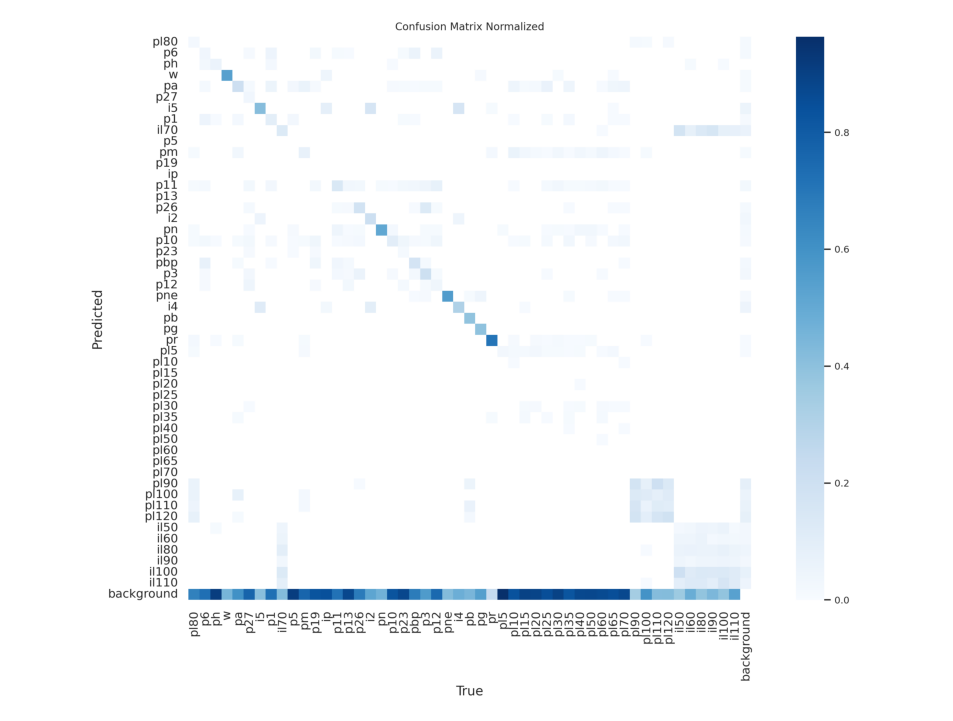

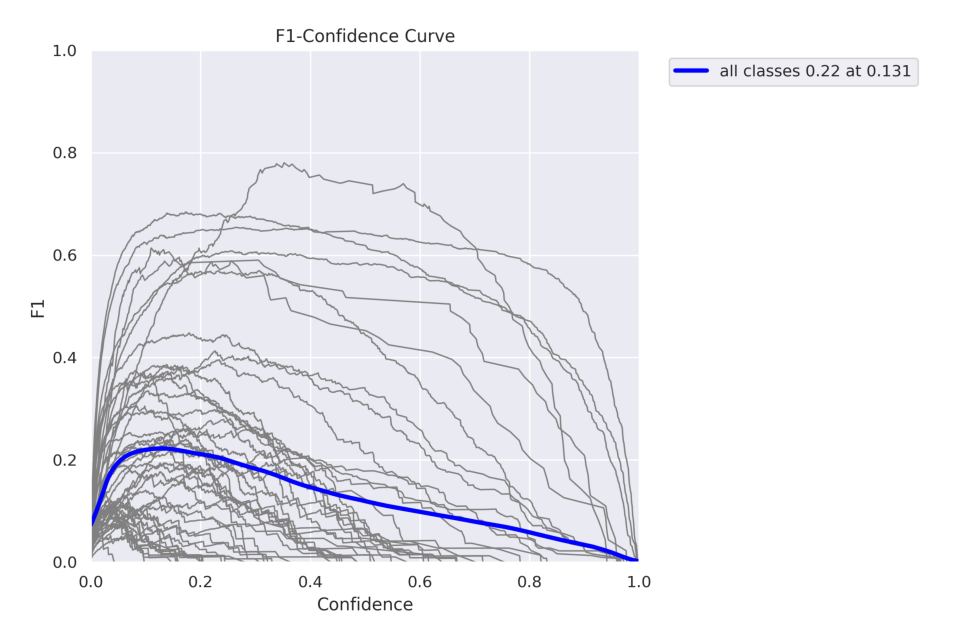

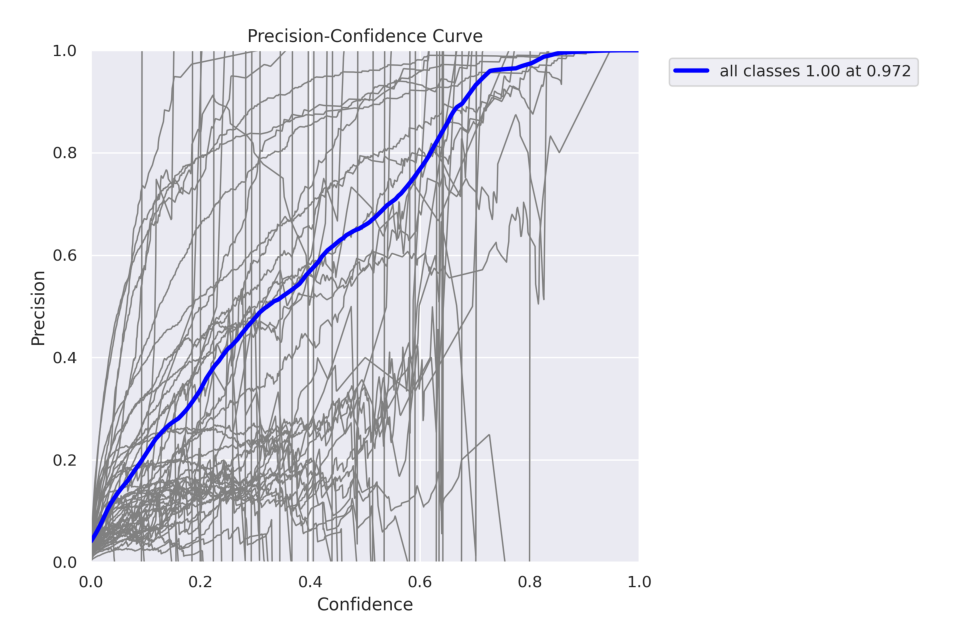

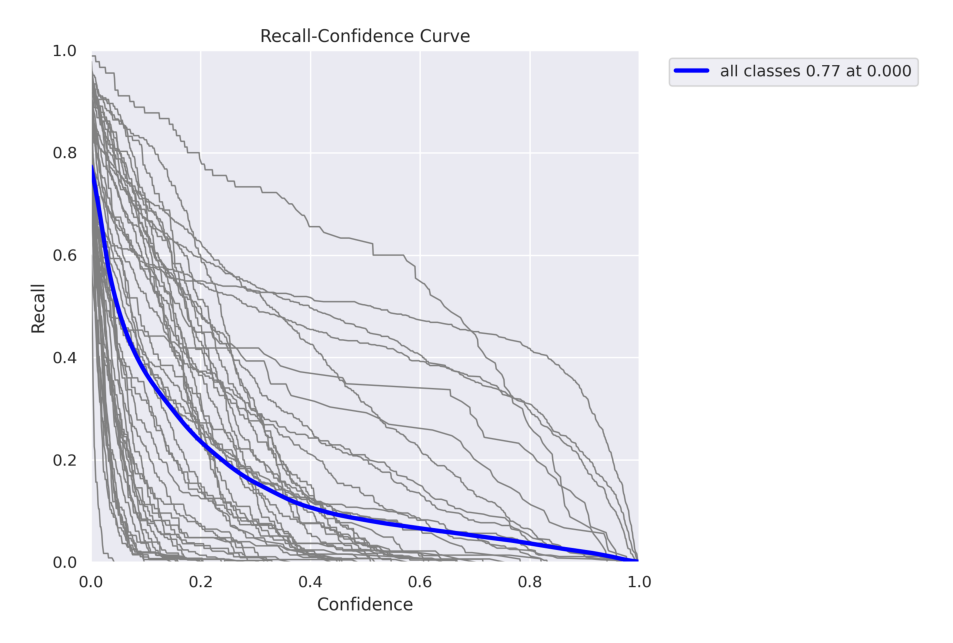

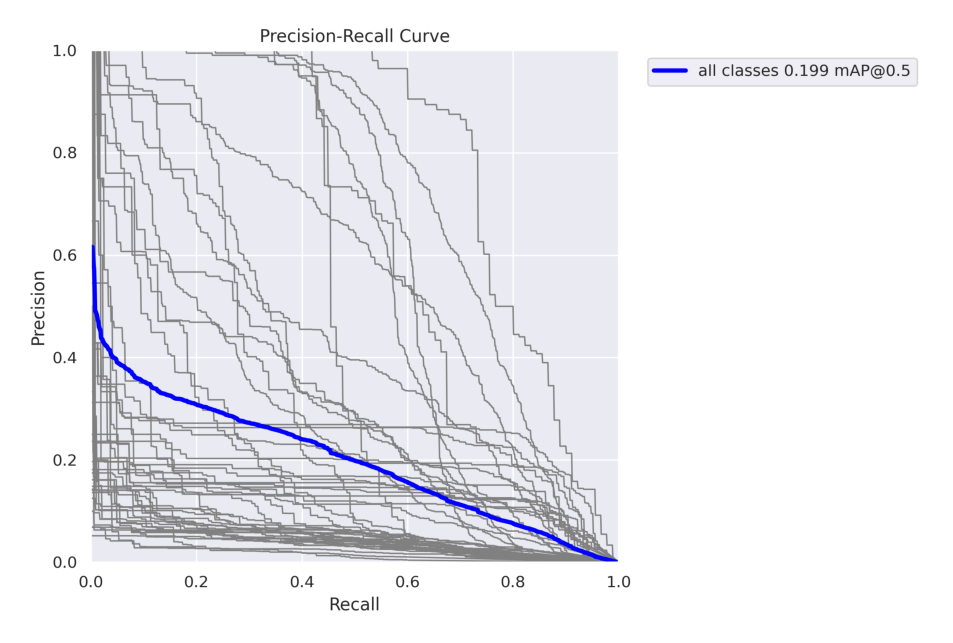

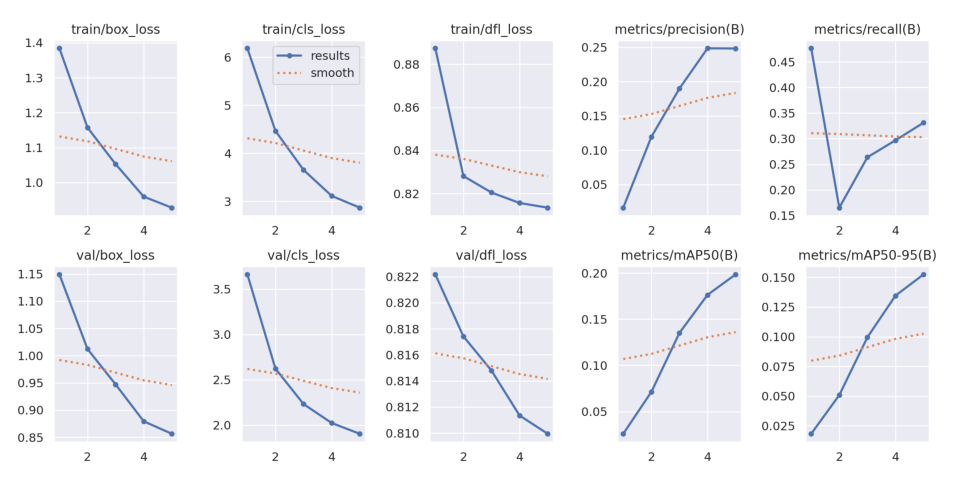

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
#List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/runs/detect/train8'

# Display the images
display_images(post_training_files_path, image_files)

In [8]:
Result_Final_model = pd.read_csv('/content/drive/MyDrive/Traffic Sign detection Yolov8/traffic_sign_detection/runs/detect/train8/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  3167.24         1.38406         6.18417         0.88740   
1      2  3826.90         1.15725         4.46477         0.82810   
2      3  4503.66         1.05280         3.65383         0.82047   
3      4  5121.88         0.95985         3.11394         0.81562   
4      5  5737.26         0.92832         2.86872         0.81345   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.01631            0.47632           0.02584   
1               0.11948            0.16531           0.07120   
2               0.19005            0.26366           0.13518   
3               0.24872            0.29680           0.17640   
4               0.24845            0.33117           0.19857   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.01815       1.14926       3.66353       0.82218  0.000061   
1              0.05079       1.01212       2.62322       0.81742  0.000099   
2              0.09950       0.94706       2.23241       0.81479  0.000111   
3              0.13463       0.87933       2.02370       0.81134  0.000075   
4              0.15253       0.85640       1.90470       0.80994  0.000038   

     lr/pg1    lr/pg2  
0  0.000061  0.000061  
1  0.000099  0.000099  
2  0.000111  0.000111  
3  0.000075  0.000075  
4  0.000038  0.000038

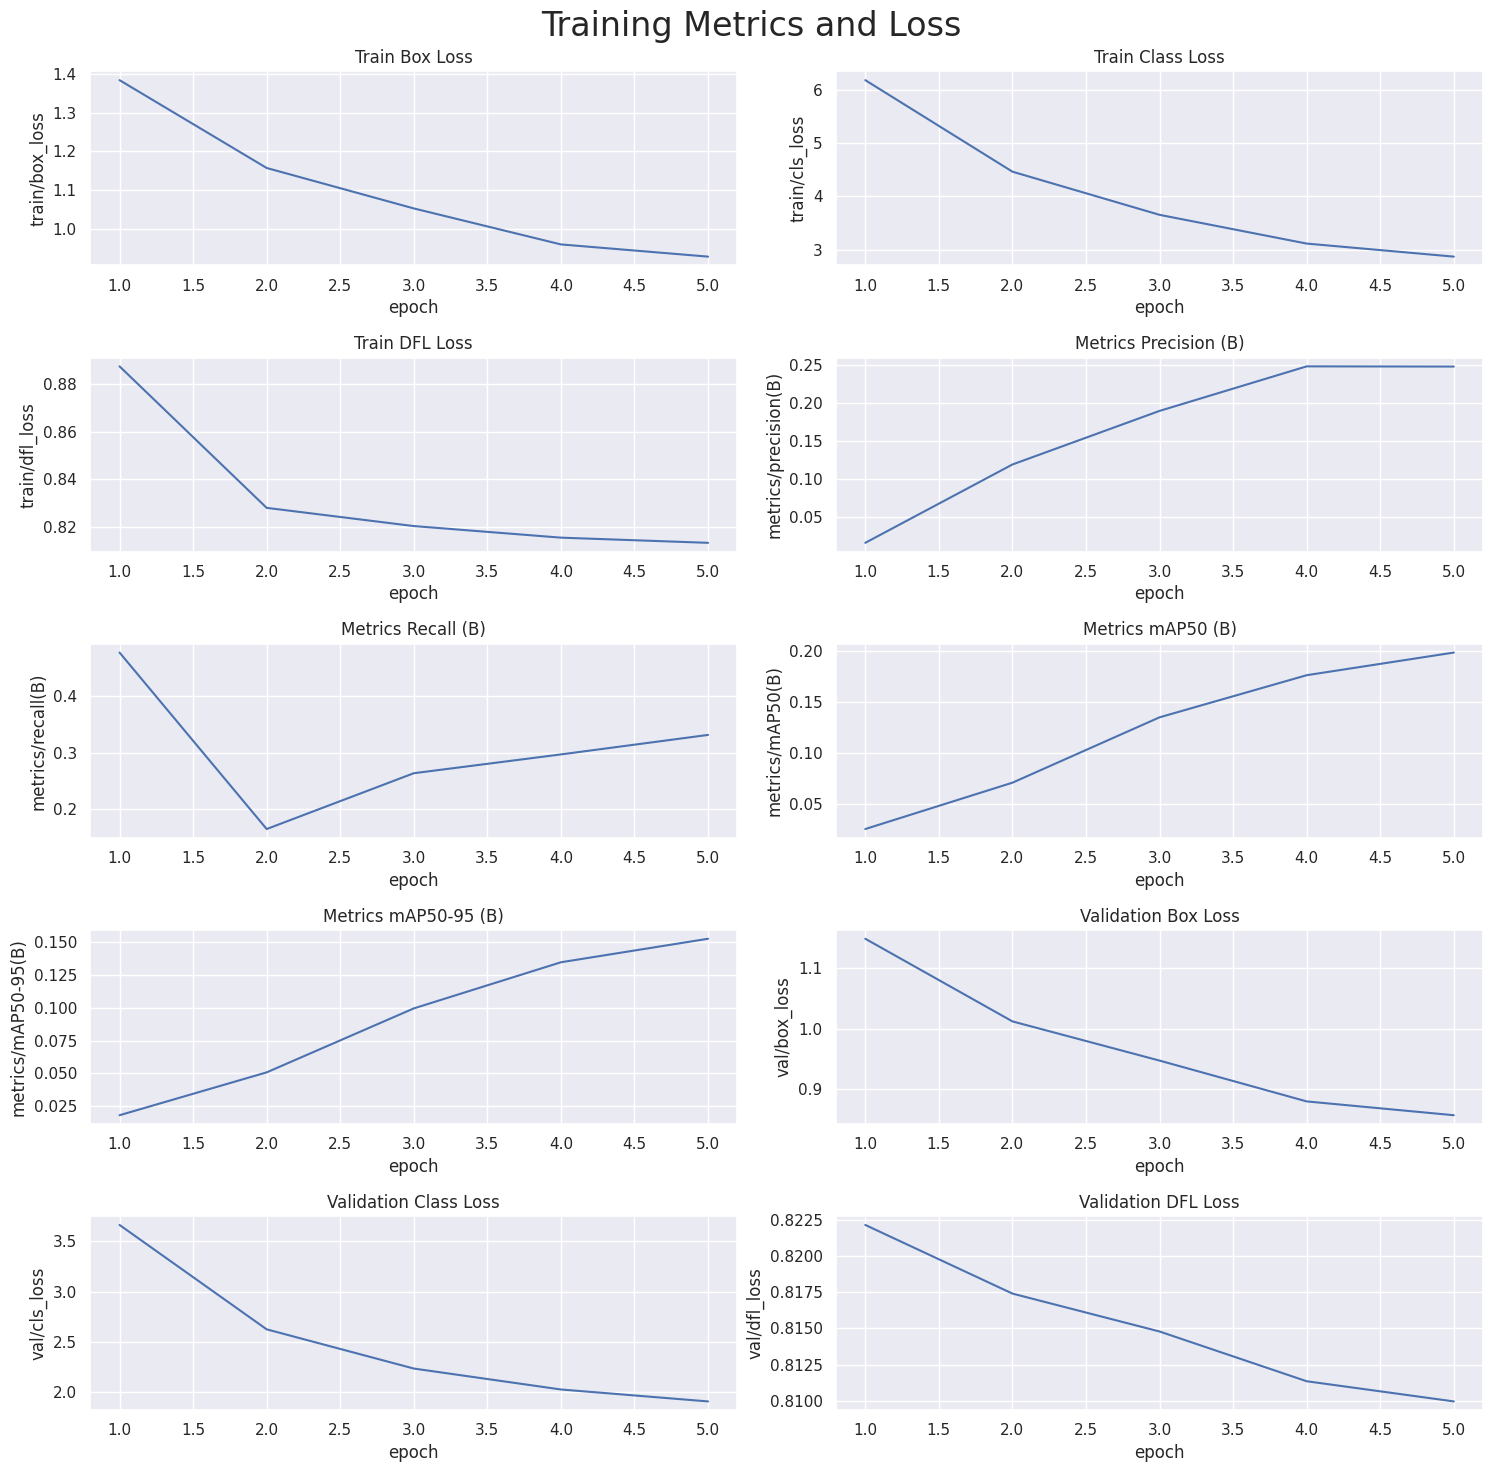

In [9]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()